In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Property_stolen_and_recovered.csv")
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
...,...,...,...,...,...,...,...,...
2444,Tamil Nadu,2010,Total Property,7. Total Property Stolen & Recovered,16125,21509,660311804,1317919190
2445,Tripura,2010,Total Property,7. Total Property Stolen & Recovered,192,879,5666102,33032746
2446,Uttar Pradesh,2010,Total Property,7. Total Property Stolen & Recovered,9130,35068,577591772,1442670414
2447,Uttarakhand,2010,Total Property,7. Total Property Stolen & Recovered,964,2234,47135685,123398840


# EDA

In [3]:
df.shape  # checking the rows and cols count

(2449, 8)

In [4]:
df.columns   # checking the various cols

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [5]:
df.describe()

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
count,2449.000000,2449.000000,2449.000000,2.449000e+03,2.449000e+03
mean,2005.499388,1232.892201,3419.420988,5.859924e+07,2.465431e+08
std,2.873294,3079.573907,8136.256820,2.494403e+08,9.670035e+08
min,2001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2003.000000,13.000000,45.000000,6.845700e+05,3.649018e+06
50%,2005.000000,113.000000,358.000000,5.851830e+06,2.701800e+07
75%,2008.000000,722.000000,1875.000000,3.406395e+07,1.214580e+08
max,2010.000000,27960.000000,80663.000000,7.470011e+09,2.377625e+10


key observation here
1.   mean is more than median in all columns
2. there is a huge diffence in 75% and max values .. 
these two obseravtion suggests there are outliers inn the dataset

In [6]:
df.dtypes   # checking the datatypes of cols

Area_Name                      object
Year                            int64
Group_Name                     object
Sub_Group_Name                 object
Cases_Property_Recovered        int64
Cases_Property_Stolen           int64
Value_of_Property_Recovered     int64
Value_of_Property_Stolen        int64
dtype: object

In [7]:
df.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

<AxesSubplot:>

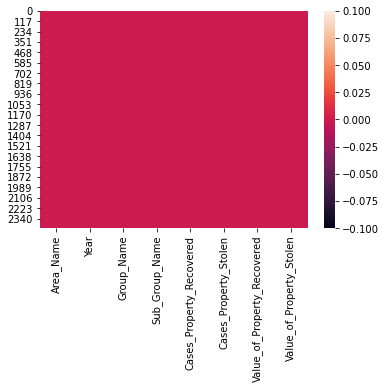

In [8]:
# here data  set has no mising values 
sns.heatmap(df.isnull())

Checking the unique values below variables are having . So as to convert the nominal values to numerical for further data modelling

In [9]:
df.Area_Name.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [10]:
df.Group_Name.unique()

array(['Burglary - Property', 'Criminal Breach of Trust - Property',
       'Dacoity -Property', 'Other heads of Property',
       'Robbery - Property', 'Theft - Property', 'Total Property'],
      dtype=object)

In [11]:
df.Sub_Group_Name.unique()

array(['3. Burglary', '5. Criminal Breach of Trust', '1. Dacoity',
       '6. Other Property', '2. Robbery', '4. Theft',
       '7. Total Property Stolen & Recovered'], dtype=object)

In [12]:
df.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [13]:
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [14]:
dfcor=df.corr()
dfcor

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
Year,1.000000,0.022467,0.028893,0.099033,0.100732
Cases_Property_Recovered,0.022467,1.000000,0.935765,0.495588,0.579084
Cases_Property_Stolen,0.028893,0.935765,1.000000,0.508971,0.643448
Value_of_Property_Recovered,0.099033,0.495588,0.508971,1.000000,0.580554
Value_of_Property_Stolen,0.100732,0.579084,0.643448,0.580554,1.000000


<AxesSubplot:>

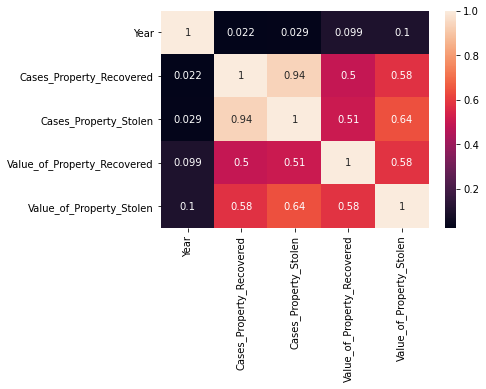

In [15]:
plt.Figure(figsize=(6,4))
sns.heatmap(dfcor,annot=True)

All Columns have a positive correlation with taget variable other than year

Year variable is negatively correlated with all columns. we may drop this variable later if reqd 

In [16]:
#Univariate analysis

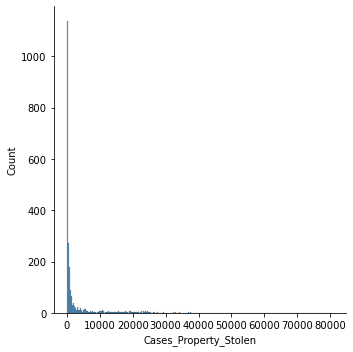

In [17]:
sns.displot(df["Cases_Property_Stolen"])
plt.show()

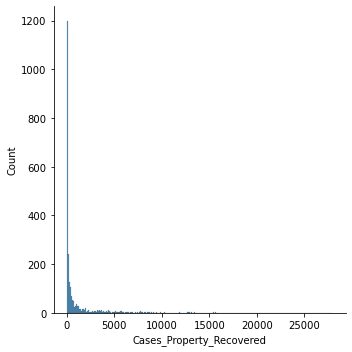

In [18]:
sns.displot(df["Cases_Property_Recovered"])
plt.show()

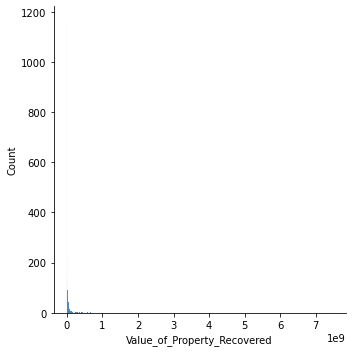

In [19]:
sns.displot(df["Value_of_Property_Recovered"])
plt.show()

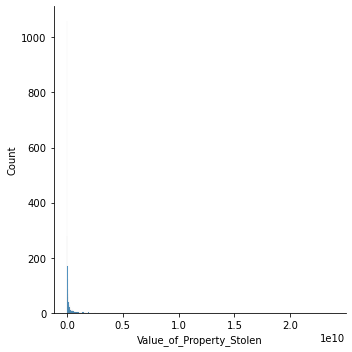

In [20]:
sns.displot(df["Value_of_Property_Stolen"])
plt.show()

univariate analysis shows the data is highly +vely skewed

In [21]:
#bivariate analysis

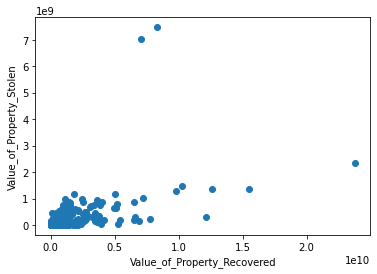

In [22]:
plt.scatter(df["Value_of_Property_Stolen"],df["Value_of_Property_Recovered"])
plt.xlabel("Value_of_Property_Recovered")
plt.ylabel("Value_of_Property_Stolen")
plt.show()

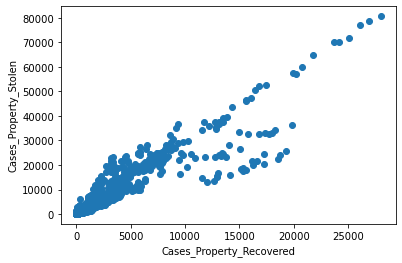

In [23]:

plt.scatter(df["Cases_Property_Recovered"],df["Cases_Property_Stolen"])
plt.xlabel("Cases_Property_Recovered")
plt.ylabel("Cases_Property_Stolen")
plt.show()

Bivariate shows the positive correlation in cases variables only

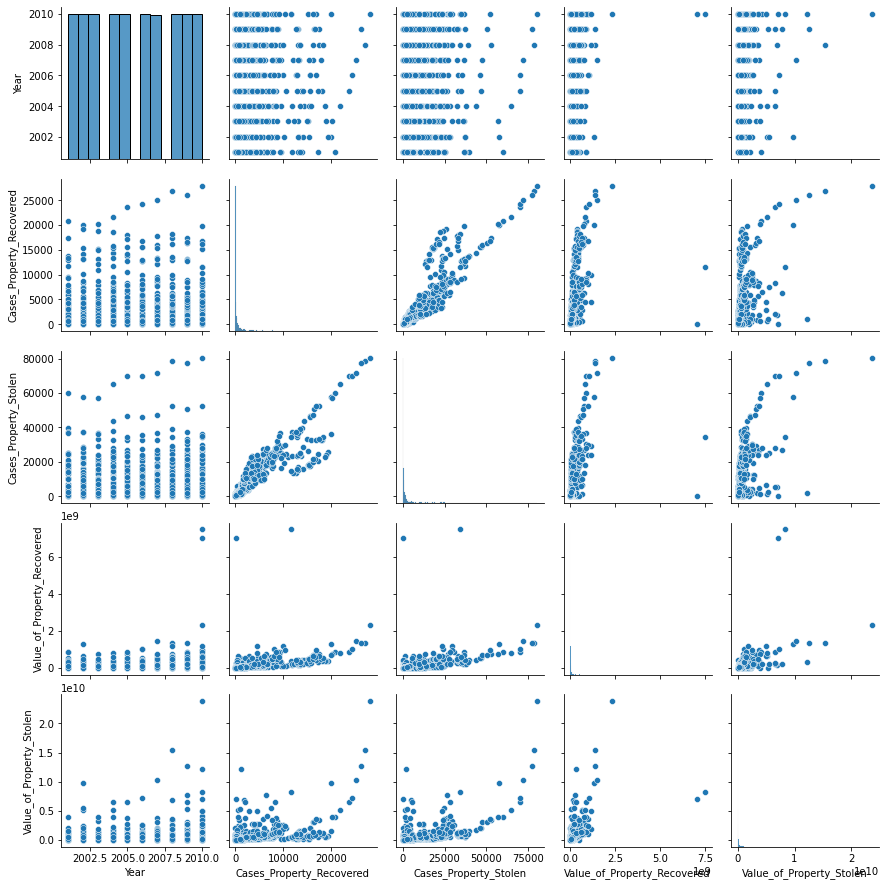

In [24]:
#multivariate analysis
sns.pairplot(df)

here also we can see that only cases variable are having linear relationship. others are positively skewed or scattered

# transforming the categorical variables to numerical for data modelling using LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()


In [27]:
list1=['Area_Name','Year','Group_Name','Sub_Group_Name']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

In [28]:
df.head(2)

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,0,0,0,2,27,64,755858,1321961
1,1,0,0,2,3321,7134,51483437,147019348


# handling Outliers

<AxesSubplot:>

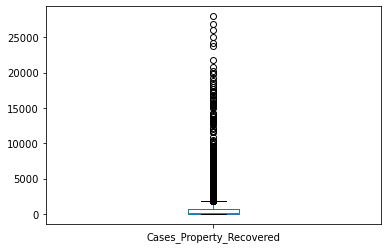

In [29]:
df["Cases_Property_Recovered"].plot.box()

<AxesSubplot:>

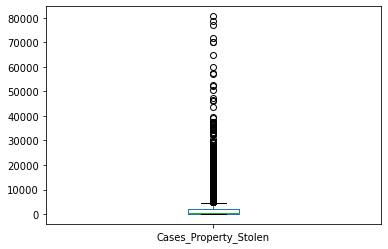

In [30]:
df["Cases_Property_Stolen"].plot.box()

<AxesSubplot:>

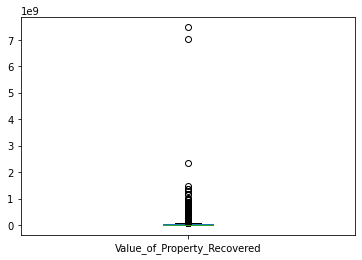

In [31]:
df["Value_of_Property_Recovered"].plot.box()

<AxesSubplot:>

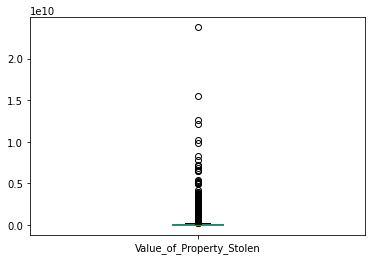

In [32]:
df["Value_of_Property_Stolen"].plot.box()

As the property value may different largely from place to place . so outliers shall be present beacause of property prices. so removing outliers in this case will be a big loss of data.  

In [33]:
df.skew()

Area_Name                       0.000121
Year                            0.000582
Group_Name                      0.000459
Sub_Group_Name                  0.000459
Cases_Property_Recovered        4.180588
Cases_Property_Stolen           4.123731
Value_of_Property_Recovered    20.650682
Value_of_Property_Stolen       11.875169
dtype: float64

In [34]:
# dividing the x varaibles features from y variable target
#x=df.drop(columns=["Value_of_Property_Recovered"])
#y=df[["Value_of_Property_Recovered"]]
x=df.iloc[:,0:-1]
y_t=df.iloc[:,-1]

In [35]:
x.shape

(2449, 7)

In [36]:
y_t.shape

(2449,)

In [37]:
from sklearn.preprocessing import power_transform

In [38]:
x_t=power_transform(x,method='yeo-johnson')

In [39]:
# scaling the data

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
sc=MinMaxScaler()

In [42]:
x_t=sc.fit_transform(x_t)

#finding the best random state

In [43]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [44]:
# importing our model libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [45]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y_t,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    predlr=mod.predict(x_test)
    tempaccu=r2_score(y_test,predlr)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 33.09060078634375 Random state 149


In [46]:
# using the best random state

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y_t,test_size=.25,random_state=149)

# finding the best model



In [48]:
#using algorithms in for loops
model=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print("Score of " , m , "is" , m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print("Mean Absolute error  " , mean_absolute_error(y_test,y_pred))
    print("Mean Squared error \n",mean_squared_error(y_test,y_pred))
    print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("r2 score " , r2_score(y_test,y_pred))
    print("**********************************************************************\n")

Score of  LinearRegression() is 0.16207736027048403
Mean Absolute error   330402021.06592363
Mean Squared error 
 3.454342806670931e+17
Root mean Squared error is 
 587736574.2125405
r2 score  0.3309060078634375
**********************************************************************

Score of  RandomForestRegressor() is 0.966080168005669
Mean Absolute error   106012227.45411094
Mean Squared error 
 1.1641409784622067e+17
Root mean Squared error is 
 341195102.3186304
r2 score  0.7745100071756591
**********************************************************************

Score of  KNeighborsRegressor() is 0.7429052663438229
Mean Absolute error   140637063.36933115
Mean Squared error 
 2.1321524877891395e+17
Root mean Squared error is 
 461752367.37770385
r2 score  0.5870095992952093
**********************************************************************

Score of  GradientBoostingRegressor() is 0.9604254712999922
Mean Absolute error   123801112.34639901
Mean Squared error 
 1.2984377765781074

# conclusion

RandomForestRegressor is best performing with accuracy .96



In [49]:
# cross validate models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x_t,y_t,cv=4,scoring='r2')
    print("Score of " , m , "is: ")
    print("Score" , score)
    print("Mean score" , score.mean())
    print("Standard Deviation is " , score.std())
    print("**********************************************************************\n")

Score of  LinearRegression() is: 
Score [-0.64532358 -0.15262412  0.00478941  0.08270986]
Mean score -0.1776121096171555
Standard Deviation is  0.2830266131275679
**********************************************************************

Score of  RandomForestRegressor() is: 
Score [-6.25984572  0.47634624  0.18403254  0.17474881]
Mean score -1.3561795339637817
Standard Deviation is  2.8337293251210247
**********************************************************************

Score of  KNeighborsRegressor() is: 
Score [-3.25765456  0.1573306   0.42380712  0.10287919]
Mean score -0.6434094144977792
Standard Deviation is  1.5142126703367031
**********************************************************************

Score of  GradientBoostingRegressor() is: 
Score [-7.01807667  0.41390575  0.37253267  0.17191303]
Mean score -1.5149313041722372
Standard Deviation is  3.1785604200382513
**********************************************************************



# hyperparameter tuning

In [50]:
# randomForestRegressor is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [51]:
# Create the parameter grid based on the results of random search 
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [52]:
rfr = RandomForestRegressor(random_state = 159)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [53]:
g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 13}


In [54]:
# using RandomForestRegressor with best parameters
rf=RandomForestRegressor(max_depth=10,bootstrap=True,n_estimators=13)
rf.fit(x_train,y_train)
print(" Score is ",rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print("Mean Absolute error  " , mean_absolute_error(y_test,predrf))
print("Mean Squared error \n",mean_squared_error(y_test,predrf))
print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,predrf)))
print("r2 score " , r2_score(y_test,predrf))
print("**********************************************************************\n")

 Score is  0.9504877002878136
Mean Absolute error   114112747.06178682
Mean Squared error 
 1.36987731240868e+17
Root mean Squared error is 
 370118536.74311966
r2 score  0.7346596064736941
**********************************************************************



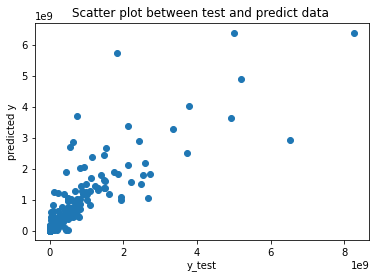

In [55]:
#plotting scatter between test data and predict data
plt.scatter(y_test,predrf)
plt.xlabel("y_test")
plt.ylabel("predicted y")
plt.title("Scatter plot between test and predict data ")
plt.show()

In [56]:
a=np.array(y_test)
a

array([ 226297520,    6830435,  695528915,      94090,   14738800,
         24899098,    6238416,   11010936,   87496183,  143137421,
          9967529,   97579635,   61950557,    5050900,   62634507,
         14931390,   87124859,          0,   42418431,  380812973,
        317553840,   86479455,  628070424,    3183650,   18953062,
          9991574,  619891309,    8264774,   23283451,     335393,
           953041,    8736993,          0,    2190825,  130520906,
          8066498,   17271204,   20075889,    2300000,   80909756,
        507723195,          0,   20650331,          0,   65234508,
        183239049,   13803082,          0,   46989588,   40020195,
         32140158,    4186195,    2045375,   57782600,    5967868,
         64576543,   36025717,   95000374,   23371050,   20579958,
         24286195,  216381714,   20825219,   12787328,    6501195,
         21667478,   22602575,   47167576,   51919570,  835804568,
        964429164,  756610830,   39917624,    5003543,   71383

In [57]:
df_con=pd.DataFrame({'original':a,"predicted":predrf},index=range(len(a)))
df_con

,original,predicted
0,226297520,1.210485e+09
1,6830435,1.285846e+07
2,695528915,1.266159e+09
3,94090,1.111406e+06
4,14738800,1.948184e+07
...,...,...
608,0,1.426534e+06
609,754337080,7.775838e+08
610,63722359,1.062954e+08
611,254373304,2.052608e+08


In [58]:
# saving the prediction model

import pickle
filename="Property_stolen_and_recoveredData.pkl"
pickle.dump(predrf,open(filename,'wb'))